In [1]:
#%% import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# set params
np.random.seed(666)

#periods
p=11

# sub-population size
s =333

#simulation
e =[]

for i in range(s):
    for j in np.arange(1,p,1):
        r = np.exp(j) * np.random.uniform(0.1,1) 
        e.append([i,j,r,'e'])
e = pd.DataFrame(e,columns=['i','j','r','g'])

# inverted-u shape
b1, b2 = 4 * 1000, - 4 * 100

u =[]

for i in range(s):
    for j in np.arange(1, p, 1):
        r = (b1 * j + b2 * j ** 2) * np.random.uniform(0.1, 1)
        u.append([i, j, r, 'u'])

        
u = pd.DataFrame(u, columns=['i', 'j', 'r', 'g'])


# log shape
b = 2000

l = []

for i in range(s):
    for j in np.arange(1, p, 1):
        r = b * np.log(j) * np.random.uniform(0.1, 1)
        l.append([i, j, r, 'l'])


l = pd.DataFrame(l, columns=['i', 'j', 'r', 'g'])


# append data
df = pd.concat([e, u, l], axis=0)

#%%create figure
FIG = plt.figure(figsize=(6,6))

ax1 = FIG.add_subplot(2,1,1)
ax2 = FIG.add_subplot(2,1,2)

#plot data
x = np.arange(1,11,1)
y_e = [0.55 * np.exp(i) for i in np.arange(1, 11, 1)]
ax1.plot(x, y_e, color='green', alpha=1, marker='o', markersize=5, label='Exponential growth')
    
y_u = [0.55 * (b1 * x + b2 * x ** 2) for x in np.arange(1, 11, 1)]
ax1.plot(x, y_u, color='red', alpha=1, marker='o', markersize=5, label='Inverted U growth')

y_l = [0.55 * (b * np.log(x)) for x in np.arange(1, 11, 1)]
ax1.plot(x, y_l, color='blue', alpha=1, marker='o', markersize=5, label='Plateau')

#fill between
ax1.fill_between(x, y_e, y_l, color='grey',alpha=0.2, interpolate=True)


# legend
ax1.legend(loc='best')

# title
ax1.set_title('Individual revenue trajectories')

# axes
ax1.set_xlabel('Time elapsed since incorporation (years)')
ax1.set_ylabel(' Revenue (K)')



#%%
#between 10 years 
x = np.arange(1,11,1)
for i in range(s):
    y_obs = df.loc[(df['i'] == i) & (df['g'] == 'e')]['r'].values
    ax2.plot(x, y_obs, color='green', alpha=0.01)
    

y_e = [0.55 * np.exp(i) for i in np.arange(1, 11, 1)]
ax2.plot(x, y_e, color='green', alpha=1, marker='o',markersize=5, label='Exponential growth')
    

for i in range(s):
    y_obs = df.loc[(df['i'] == i) & (df['g'] == 'u')]['r'].values
    ax2.plot(x, y_obs, color='red', alpha=0.01)
    

y_u = [0.55 * (b1 * x + b2 * x ** 2) for x in np.arange(1, 11, 1)]
ax2.plot(x, y_u, color='red', alpha=1, marker='o', markersize=5, label='Inverted U growth')
    

for i in range(s):
    y_obs = df.loc[(df['i'] == i) & (df['g'] == 'l')]['r'].values
    ax2.plot(x, y_obs, color='blue', alpha=0.01)


y_l = [0.55 * (b * np.log(x)) for x in np.arange(1, 11, 1)]
ax2.plot(x, y_l, color='blue', alpha=1, marker='o', markersize=5, label='Plateau')

# legend
ax2.legend(loc='best')

# title
ax2.set_title('Individual revenue within trajectories')

# axes
ax2.set_xlabel('Time elapsed since incorporation (years)')
ax2.set_ylabel('Revenue (K)')

Text(0, 0.5, 'Revenue (K)')

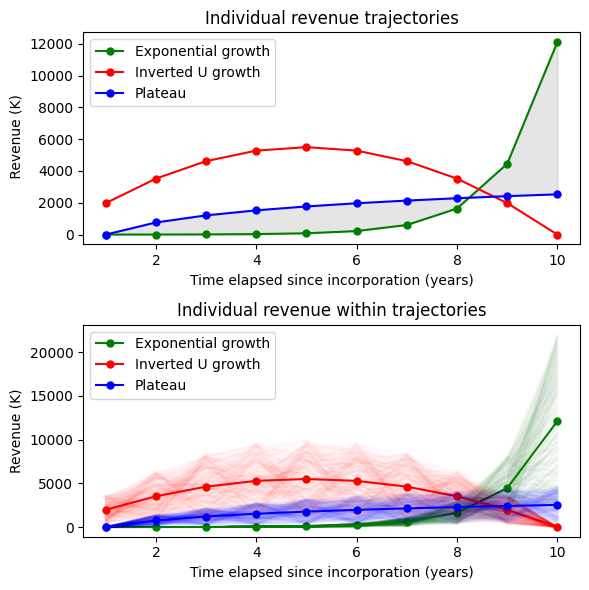

In [5]:

#%% show plot
FIG.tight_layout()  
plt.show()